In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [11]:
im = Image.open('../data/train_images/train_image_png_1.png')
im.show()

In [12]:
def rgb2gray(frame):
        return np.dot(frame[..., :3], [0.2989, 0.5870, 0.1140])

In [13]:
def whiten_and_filter(frame, r):

    def cart2pol(x, y):
        rho = np.sqrt(x ** 2 + y ** 2)
        phi = np.arctan2(y, x)

        return rho, phi

    h, w = frame.shape
    imf = np.fft.fftshift(np.fft.fft2(frame))
    fx, fy = np.meshgrid(np.arange(-w / 2, w / 2), np.arange(-h / 2, h / 2))
    rho, theta = cart2pol(fx, fy)
    filtf = rho * np.exp(-0.5 * (rho / (0.7 * r / 2)) ** 2)
    imwf = filtf * imf
    imw = np.real(np.fft.ifft2(np.fft.fftshift(imwf)))

    return imw

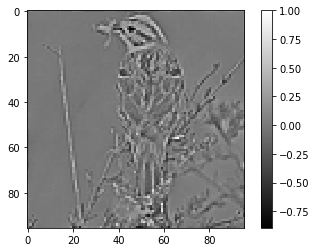

In [27]:
im_array = np.array(im)

frame = rgb2gray(im_array)
frame = whiten_and_filter(frame, 200)

plt.imshow(frame, cmap='gray')

frame_norm = frame / np.max(abs(frame))
plt.imshow(frame_norm, cmap='gray')
plt.colorbar()

IM VAR: 21.739854686417658
PATCHES VAR: 21.739854686417658
trying
783.4621604021081
trying
12.139392922849307
trying
3329.9718003001153
trying
3065.0472763294174
trying
920.7278607726571
trying
6478.494617401506
trying
1930.1848416651305
trying
7699.6879954244905
trying
6851.842042011048
trying
2375.2546707987635
trying
1877.6847382990536
trying
286.2008968422401
trying
4081.765310123481
trying
4719.163983310625
trying
694.6441170785953
trying
958.8889993631149
trying
2512.234175832129
trying
12.836586458506677
trying
1202.950252707903
trying
1544.69396239863
trying
2344.714585885788
trying
169.28280624918082
trying
3507.324632116109
trying
585.0508775028466
trying
1806.4842808134401
trying
2063.8135982237854
trying
1399.3791211082405
trying
2678.469171831377
trying
804.14761721447
trying
2434.2672799643947
trying
3898.5870865444076
trying
691.9989290032601
trying
270.78592818619313
trying
4.162992590423822


<function matplotlib.pyplot.show(*args, **kw)>

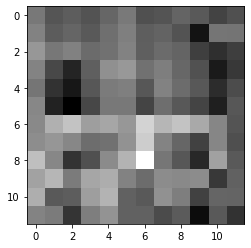

In [66]:
from sklearn.feature_extraction.image import extract_patches_2d

n = 1

im_var = np.var(frame) / (96**2)
patches_var = im_var
print('IM VAR:', im_var)
print('PATCHES VAR:', patches_var)

while patches_var > 0.2 * im_var:
    print('trying')
    patches = extract_patches_2d(frame, patch_size=(12,12), max_patches=n)
    patches_var = np.var(patches[0].flatten()) / (12**2)
    print(patches_var)

# fig, axes = plt.subplots(5,5) 
# for i, ax in enumerate(axes.flatten()):
#     ax.imshow(patches[i], cmap='gray')
#     ax.label_outer()

plt.imshow(patches[0], cmap='gray')
plt.show



In [110]:
%load_ext autoreload
%autoreload 2
sys.path.append('../')
from inputs import *

inp = ImagePatchInput('inp', path='../data/train_images/', patch_size=(12,12), r=100)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


loading from image 34
../data/train_images/train_image_png_34.png
(1, 12, 12)


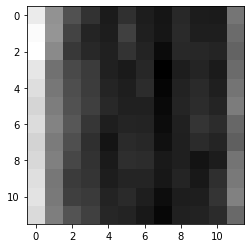

In [144]:
inp.initialise(1000, 1)
plt.imshow(inp.I[0,:,:], cmap='gray')